In [1]:
import os, gensim

def iter_documents(top_directory):
    """Iterate over all documents, yielding a document (=list of utf8 tokens) at a time."""
    for root, dirs, files in os.walk(top_directory):
        for file in filter(lambda file: file.endswith('.txt'), files):
            document = open(os.path.join(root, file), encoding='utf8').read() # read the entire document, as one big string
            yield gensim.utils.tokenize(document, lower=True) # or whatever tokenization suits you

class MyCorpus(object):
    def __init__(self, top_dir):
        self.top_dir = top_dir
        self.dictionary = gensim.corpora.Dictionary(iter_documents(top_dir))
        self.dictionary.filter_extremes(no_below=1, keep_n=30000) # check API docs for pruning params

    def __iter__(self):
        for tokens in iter_documents(self.top_dir):
            yield self.dictionary.doc2bow(tokens)

            
folder = 'WMT_XML'       

corpus = MyCorpus(folder) # create a dictionary

In [2]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np

os.environ['DTM_PATH'] = r"dtm-win64.exe"

if not os.environ.get('DTM_PATH', None):
    raise ValueError("SKIP: You need to set the DTM path")

In [18]:
import glob

time_seq = []

for year in range(2010, 2021):
    docs_num = len(glob.glob(folder + "\\" + str(year) + "*"))
    print(f"Year {year} has {docs_num} documents")
    time_seq.append(docs_num)

Year 2010 has 135 documents
Year 2011 has 133 documents
Year 2012 has 136 documents
Year 2013 has 143 documents
Year 2014 has 172 documents
Year 2015 has 139 documents
Year 2016 has 142 documents
Year 2017 has 204 documents
Year 2018 has 222 documents
Year 2019 has 183 documents
Year 2020 has 46 documents


In [44]:
time_seq

[135, 133, 136, 143, 172, 139, 142, 204, 222, 183, 46]

In [20]:
dtm_path = os.environ['DTM_PATH']

In [21]:
num_topics = 5

model = DtmModel(dtm_path, corpus, time_seq, num_topics=num_topics,
                 id2word=corpus.dictionary, initialize_lda=True)

In [45]:
topic_list = []
show_top = 7

for id in range(num_topics):
    topic = [model.show_topic(topicid=id, time=time, topn=show_top) for time in range(len(time_seq))]
    topic_list.append(topic)

In [46]:
topic_list[0]

[[(0.045583211934245374, 'font'),
  (0.03786841069062539, 'px'),
  (0.03122404930451783, 'style'),
  (0.029336723389639517, 'padding'),
  (0.02928305856723981, 'pt'),
  (0.024535185039445517, 'div'),
  (0.0235988897464325, 'accounting')],
 [(0.04747957749394502, 'font'),
  (0.0399027255599953, 'px'),
  (0.032816074388367006, 'style'),
  (0.032532876741050445, 'padding'),
  (0.03129154808381243, 'pt'),
  (0.02656916865975073, 'div'),
  (0.020476854960207295, 'align')],
 [(0.051074540081574075, 'font'),
  (0.04446953437643513, 'px'),
  (0.039384572577346906, 'padding'),
  (0.03585552711074277, 'style'),
  (0.03525459335761655, 'pt'),
  (0.03073801022220199, 'div'),
  (0.02252130312308134, 'align')],
 [(0.054669650504431885, 'font'),
  (0.05048923781890722, 'px'),
  (0.04885742979603836, 'padding'),
  (0.03996132843072774, 'pt'),
  (0.03908600584572841, 'style'),
  (0.036085959752433706, 'div'),
  (0.024807496609364064, 'align')],
 [(0.058951907405551084, 'padding'),
  (0.0577421736273714

In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

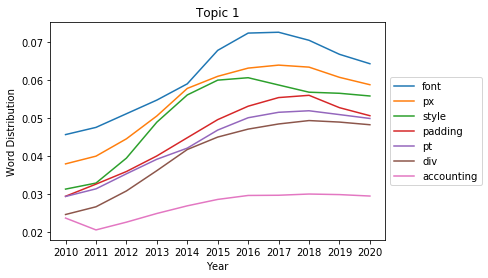

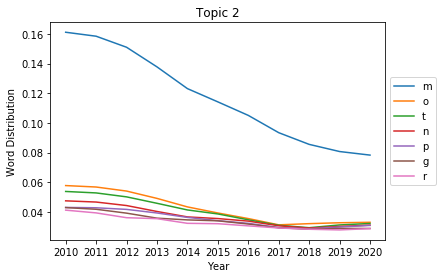

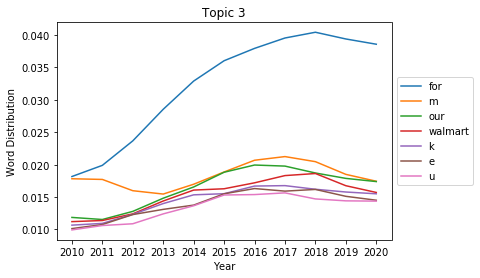

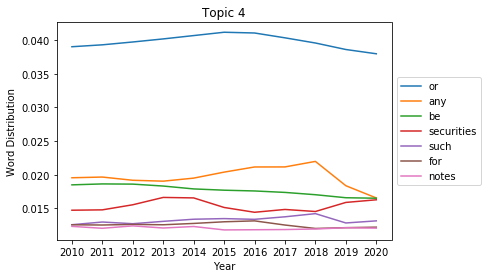

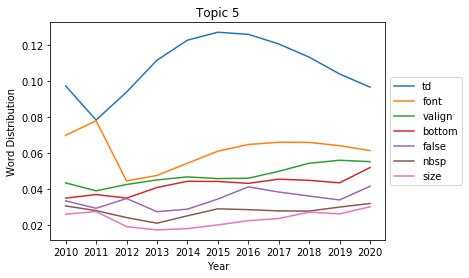

In [49]:
x = range(2010,2010+len(time_seq))

for index, topic in enumerate(topic_list):
    plt.title("Topic " + str(index+1))

    for word in range(show_top):
        prob = [sub[word] for sub in topic]
        values = [probability[0] for probability in prob]
        plt.plot(x, values, label = prob[0][1])
    
    plt.xticks(np.arange(2010, 2021, step = 1))
    plt.ylabel("Word Distribution")
    plt.xlabel("Year")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

In [ ]:
for topic in range(num_topics):
    print(f'Topic {topic}')
    print(model.print_topics()[topic])
    print()